# ResNet50 Implementation

1. Skip steps from "Crop Images to 256x256x3" to "Save the preproccessed as data.h5 file" if you only want to reproduce the model based on data we have; Start from beginning if you have new data.
2. The feature process for the model is quite long. You can directly download the model from [ResNet50](https://drive.google.com/file/d/17gfalgEEV5UQ9XLYt95Ehcha7JHY0qhG/view) and then load the model by running model = load_model('your path with model').

## Load Required packages

In [1]:
from numpy.random import seed
seed(5243)
import tensorflow
tensorflow.random.set_seed(5243)
from keras import layers
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
import h5py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_curve, auc
import glob
import os
import pydot
import numpy as np
import cv2
import csv
import time
import skimage.io
from PIL import Image
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


## Crop Images to 256x256x3

In [2]:
your_path = "/Users/Stephanie/Documents/GitHub/Fall2020-Project3-group_3"
os.chdir(your_path)
path = os.getcwd()

class FaceCropper(object):
    CASCADE_PATH = path + "/lib/haarcascade_frontalface_default.xml"

    def __init__(self):
        print(self.CASCADE_PATH)
        self.face_cascade = cv2.CascadeClassifier(path + "/lib/haarcascade_frontalface_default.xml")
        

    def generate(self, image_path, show_result=False, d = 0):
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(img, 1.1, 5, minSize=(100, 100))
        facecnt = len(faces)
        print("Detected faces: %d" % facecnt)

        if (faces is None):
            return faces
        elif len(faces) > 1:
            eval = []

            # solve the issue when there are multiple detection
            for face in faces:
                x,y,w,h = face
                r = max(w, h) / 2
                size = r*2
                eval.append(size)
            ind = eval.index(max(eval))
            faces = faces.tolist()
            faces = [faces[ind]]

        # zoom a bit more than usual
        for (x, y, w, h) in faces:
            newx, newy,neww,newh = x+d,y+d,w-d,h-d
            r = max(neww, newh) / 2
            centerx = newx + neww / 2
            centery = newy + newh / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)
            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (256, 256))

            return lastimg

        if (show_result):
            for (x, y, w, h) in faces:
                newx, newy, neww, newh = x, y, w - d, h - d
                cv2.rectangle(img, (newx, newy), (newx+neww, newy+newh), (255,0,0), 2)
            cv2.imshow('img', img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

if __name__ == '__main__':
   
    image_path = path + "/data/train_set/images"
    if not os.path.exists(path + '/data/data_1'):
        os.makedirs(path + '/data/data_1')
    destination = path + "/data/data_1"
    if not os.path.isdir(destination):
        os.makedirs(destination)
    if os.path.isdir(image_path):
        file_names = glob.glob(image_path+"/*.jpg")
        faceDetector = FaceCropper()
        for i in range(len(file_names)):
            name = file_names[i]
            print(name)
            result = faceDetector.generate(name)
            if result is None:
                result = faceDetector.generate(file_names[i + 1])
                resname = destination + "/" + os.path.basename(name)
                cv2.imwrite(resname, result)

            else:
                resname = destination + "/" + os.path.basename(name)
                cv2.imwrite(resname, result)

        print("The Face Chopping is done!")

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/lib/haarcascade_frontalface_default.xml
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0071.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2666.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2100.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0717.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1409.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0703.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2114.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2672.jpg
Detected faces: 1
/Users/stephanie/Documents/G

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1555.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1233.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2909.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0878.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2935.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0844.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1582.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0688.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0850.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0272.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2465.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0925.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1385.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2854.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2840.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2698.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1391.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0931.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2275.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1754.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1032.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1026.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0338.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2249.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1998.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1740.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1973.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2260.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2506.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0311.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1190.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2499.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1184.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1812.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1806.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1153.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0275.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1180.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2489.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1194.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1802.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1816.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1037.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0329.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1989.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2271.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1778.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0466.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0300.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2517.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2503.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0314.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0472.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2265.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2688.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2850.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1381.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0921.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0909.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2878.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1154.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1632.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1626.jpg
Detected faces: 1
/

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0698.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2931.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0115.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2702.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2064.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0673.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0667.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1579.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2070.jpg
Detected faces: 1
/Users/stephanie/Do

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2138.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1431.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0049.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1357.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2886.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0774.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2163.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2605.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0012.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2995.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2759.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2981.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1250.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1536.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0628.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0827.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2956.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1287.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0946.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1480.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2189.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0952.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1494.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2823.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1325.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0985.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1443.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1737.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1723.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1045.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1910.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1904.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1092.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1938.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0398.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1086.jpg
Detected faces: 2
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2203.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0414.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1695.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2388.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1681.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1859.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1871.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1865.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0548.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0564.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2373.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2415.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0202.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0216.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1108.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2401.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2367.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0570.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2992.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1243.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1257.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0149.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2986.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2038.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1531.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1900.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1914.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0017.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0771.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2166.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2172.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0765.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0003.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2614.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2827.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0956.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0189.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1297.jpg
Detected faces: 2
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1283.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2952.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0823.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0610.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2007.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2761.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1268.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0980.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0758.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1320.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2629.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1334.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1452.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0994.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2142.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0755.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2988.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2744.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0153.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0635.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2022.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1503.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1265.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1271.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2778.jpg
Detected faces: 1
/

/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2433.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0224.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0230.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2427.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2341.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1890.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0556.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1648.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2816.jpg
Detected faces: 1
/Users/stephanie/Do

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1851.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1689.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1879.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0352.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2545.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2223.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0434.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0420.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2237.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1703.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1065.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1071.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2578.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1717.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0409.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2236.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0421.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0347.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0784.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0948.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0790.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2187.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2839.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1667.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0579.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2408.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1101.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2780.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2958.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0197.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1289.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0829.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0801.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2970.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2964.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0815.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2810.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0961.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0752.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2145.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2623.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0034.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0020.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2637.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2151.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1923.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0383.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2594.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2580.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0397.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1089.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1937.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2769.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1260.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1856.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2387.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2436.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0221.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0547.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1881.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1659.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2350.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2344.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0508.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2479.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1170.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1164.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1602.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1831.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2486.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0291.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0285.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2068.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0657.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1549.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2040.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2726.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0131.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0125.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2732.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2054.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2646.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2120.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1429.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0737.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1359.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0047.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2888.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2650.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2136.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2056.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2730.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0127.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1239.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2718.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1211.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1577.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0669.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1563.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0278.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2447.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0250.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0536.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1628.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2321.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2335.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0522.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0244.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1016.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0308.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2279.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1770.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1764.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1002.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2523.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0334.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0452.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1981.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0447.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2250.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2536.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0321.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0335.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2522.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2244.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1995.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0928.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0096.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1388.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2681.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2859.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2695.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0082.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1175.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1613.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2086.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0849.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0691.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0685.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2092.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2904.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0875.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0861.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2910.jpg
Detected faces: 1
/

Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0097.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2870.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0901.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0915.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2864.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/2657.jpg
Detected faces: 2
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0040.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/1438.jpg
Detected faces: 1
/Users/stephanie/Documents/GitHub/Fall2020-Project3-group_3/data/train_set/images/0726.jpg
Detected faces: 1
/

## Classify images

In [3]:
path = os.getcwd()
read_path = path + "/data/data_1"


save_path = path + '/data/data_2'
if not os.path.exists(save_path):
    os.makedirs(save_path)
import pandas as pd 
data = pd.read_csv(path + "/data/train_set/label.csv") 
file_list = sorted(os.listdir(read_path))
lab = data['label']

for i in range(len(file_list)):
    label = str(lab[i])
    subfolder = os.path.join(save_path, label)
    image = file_list[i]
    if not os.path.exists(subfolder):
        os.makedirs(subfolder)
    img = cv2.imread(os.path.join(read_path, image))
    img = cv2.resize(img, (64, 64))
    cv2.imwrite(os.path.join(subfolder, image), img)

print("Image classification is done!")

Image classification is done!


## Save the preproccessed as data.h5 file

In [4]:
path = os.getcwd()
data_path = path + '/data/data_2'

c0_path = os.path.join(data_path, '0')
c1_path = os.path.join(data_path, '1')


# # Creat the list to store the data and label information
data_x = []
data_y = []


datapath = os.path.join(path + '/data/h5','data.h5')
if not os.path.exists(os.path.dirname(datapath)):
    os.makedirs(os.path.dirname(datapath))

# order the file, so the training set will not contain the test set (don't random)
files = os.listdir(c0_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(c0_path,filename))
    data_x.append(I.tolist())
    data_y.append(0)

files = os.listdir(c1_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(c1_path,filename))
    data_x.append(I.tolist())
    data_y.append(1)

print(np.shape(data_x))
print(np.shape(data_y))

datafile = h5py.File(datapath, 'w')
datafile.create_dataset("data_pixel", dtype = 'uint8', data=data_x)
datafile.create_dataset("data_label", dtype = 'int64', data=data_y)
datafile.close()

print("Save data finish!")

(3000, 64, 64, 3)
(3000,)
Save data finish!


## Deal with imbalanced data for all

In [5]:
X_orig = np.array(h5py.File(os.getcwd()+ '/data/h5/data.h5', "r")["data_pixel"][:]) 
Y_orig = np.array(h5py.File(os.getcwd()+ '/data/h5/data.h5', "r")["data_label"][:])


In [6]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_orig[Y_orig==1])))
print("Before OverSampling, counts of label '0': {} \n".format(len(Y_orig[Y_orig==0])))

from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import SVMSMOTE 
smote = SMOTE()
X_orig_smote, Y_orig_smote = smote.fit_sample(X_orig.reshape(X_orig.shape[0], -1), Y_orig.ravel()) #1914 0, 1914 1
X_orig_smote = X_orig_smote.reshape(X_orig_smote.shape[0], 64, 64, 3)

print("After OverSampling, counts of label '1': {}".format(sum(Y_orig_smote[Y_orig_smote==1]))) 
print("After OverSampling, counts of label '0': {}".format(len(Y_orig_smote[Y_orig_smote==0]))) 

Before OverSampling, counts of label '1': 598
Before OverSampling, counts of label '0': 2402 

After OverSampling, counts of label '1': 2402
After OverSampling, counts of label '0': 2402


## Train test data split

In [7]:
def load_dataset():
#     path1 = os.getcwd()
#     data_path1 = path1 + '/data/h5/data.h5'
#     train_dataset = h5py.File(data_path1, "r")
#     X_orig = np.array(train_dataset["data_pixel"][:]) # your train set features
#     Y_orig = np.array(train_dataset["data_label"][:]) # your train set labels
    X_train, X_test, y_train, y_test = train_test_split(X_orig_smote, Y_orig_smote, test_size=0.2, random_state=5243)
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test

In [8]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [9]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset() #2400 train data, 600 test data

## Normalize image vectors and convert training and test labels to one hot matrices

In [10]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 2).T
Y_test = convert_to_one_hot(Y_test_orig, 2).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 3843
number of test examples = 961
X_train shape: (3843, 64, 64, 3)
Y_train shape: (3843, 2)
X_test shape: (961, 64, 64, 3)
Y_test shape: (961, 2)


## Build Resnet Model

In [11]:
def identity_block(X, f, filters, stage, block):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value.
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
      
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
       
    return X

In [12]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path 
    X = Conv2D(F2, (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [13]:
def ResNet50(input_shape = (64, 64, 3), classes = 2):
    """
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), name = 'avg_pool')(X)
    
    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
   
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

## Configure the Learning Process by Compiling the Model

In [14]:
model = ResNet50(input_shape = (64, 64, 3), classes = 2)
start_time = time.time()
model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy']) 

In [15]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64)
print("training  model takes %s seconds" % round((time.time() - start_time),3))

Epoch 1/20
61/61 [==============================] - 93s 2s/step - loss: 0.6209 - accuracy: 0.7689
Epoch 2/20
61/61 [==============================] - 91s 1s/step - loss: 0.4737 - accuracy: 0.8004
Epoch 3/20
61/61 [==============================] - 91s 1s/step - loss: 0.4975 - accuracy: 0.7531
Epoch 4/20
61/61 [==============================] - 92s 2s/step - loss: 0.3785 - accuracy: 0.8246
Epoch 5/20
61/61 [==============================] - 92s 2s/step - loss: 0.4798 - accuracy: 0.7505
Epoch 6/20
61/61 [==============================] - 92s 2s/step - loss: 0.4147 - accuracy: 0.8124
Epoch 7/20
61/61 [==============================] - 92s 2s/step - loss: 0.4763 - accuracy: 0.7817
Epoch 8/20
61/61 [==============================] - 92s 2s/step - loss: 0.4892 - accuracy: 0.7778
Epoch 9/20
61/61 [==============================] - 92s 2s/step - loss: 0.5249 - accuracy: 0.7455
Epoch 10/20
61/61 [==============================] - 92s 2s/step - loss: 0.4646 - accuracy: 0.7681
Epoch 11/20
61/61 [

In [16]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

31/31 [==============================] - 3s 112ms/step - loss: 0.4046 - accuracy: 0.8231
Loss = 0.404598593711853
Test Accuracy = 0.8231009244918823


## ROC curve with AUC

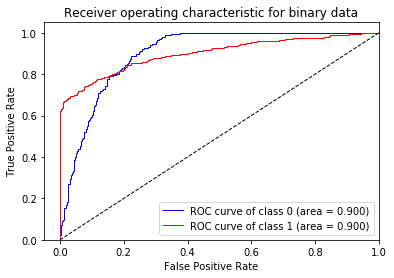

In [17]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.predict(X_test)
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red'])

for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for binary data')
plt.legend(loc="lower right")
plt.show()

In [18]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

## Plot our ResNet50 model 

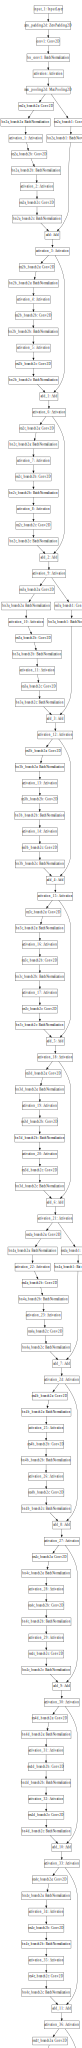

In [19]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Save Model

In [20]:
model.save('/Users/Stephanie/Documents/GitHub/Fall2020-Project3-group_3/output/ResNet50.h5')

In [21]:
del model
model =load_model('/Users/Stephanie/Documents/GitHub/Fall2020-Project3-group_3/output/ResNet50.h5')